In [1]:
import models
from models import data_tools, extrair_indicadores, get_raw_data, extrair_indicadores
import pandas as pd
import numpy as np


ordem = 2

Roller_diameter = 0.235
Pitch_diameter = 1.245
Number_elements = 8
Contact_angle = 0

d = Roller_diameter
Dian = Pitch_diameter
n = Number_elements

ball_pass_frequency = 0.5*(Dian/d)*(1-(d/Dian)**2)
outer_race_frequency = n*0.5*(1-(d/Dian))

freq_ref = [ball_pass_frequency,outer_race_frequency]
rotacao = 25
defeito = 'normal'
freq_aquisicao = models.frequency_rate_dict[defeito]

rpm = 25
sensor = 'rolamento_interno_radial1'

df_normal = get_raw_data.GetData('data','normal.csv').GetDataframe()
df_outer = get_raw_data.GetData('data','outer_race.csv').GetDataframe()

defeito_outer = 'outer_race_alto'
json = {'normal':df_normal,defeito_outer:df_outer}

In [2]:
defeito_normal = 'normal'
df_normal = extrair_indicadores.ExtrairIndicadores(json[defeito_normal],freq_ref,rpm,defeito_normal,sensor,freq_aquisicao).Get(ordem)
df_normal = pd.json_normalize(df_normal)
df_normal = df_normal.astype({"curtose": float})
df_normal

,rotacao_hz,maximo,rms,assimetria,curtose,fator_crista,soma_relativa_ball_fault,soma_ball_fault,soma_relativa_outer_race,soma_outer_race,soma_relativa_rotacao_hz,soma_rotacao_hz,sensor,defeito
0,25,3.708878,0.889038,0.005447,3.015719,4.171786,0.001506,156.362215,0.001582,164.251159,0.002314,240.299618,rolamento_interno_radial1,normal
1,25,3.637024,0.889650,0.005167,3.017126,4.088151,0.001674,173.711439,0.001742,180.812812,0.002381,247.119871,rolamento_interno_radial1,normal
2,25,3.637024,0.888812,0.007014,3.016282,4.092005,0.001474,152.730893,0.001561,161.701676,0.002630,272.457603,rolamento_interno_radial1,normal
3,25,3.637024,0.887147,0.009517,3.019712,4.099685,0.001521,157.399600,0.001614,166.986644,0.002509,259.657057,rolamento_interno_radial1,normal
4,25,3.637024,0.886873,0.011740,3.017776,4.100952,0.001448,150.324729,0.001554,161.321929,0.002207,229.069710,rolamento_interno_radial1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,25,4.219469,0.882280,0.002441,3.012659,4.782458,0.001359,137.789000,0.001455,147.502695,0.002484,251.881437,rolamento_interno_radial1,normal
97,25,4.219469,0.883142,0.002576,3.014636,4.777793,0.001597,162.518546,0.001667,169.717233,0.002267,230.731885,rolamento_interno_radial1,normal
98,25,4.219469,0.884127,0.000431,3.017881,4.772470,0.001565,159.713835,0.001650,168.350505,0.002181,222.576014,rolamento_interno_radial1,normal
99,25,4.219469,0.884940,0.000006,3.020899,4.768085,0.001399,142.939489,0.001516,154.925707,0.002331,238.234038,rolamento_interno_radial1,normal


In [3]:

df_outer = extrair_indicadores.ExtrairIndicadores(json[defeito_outer],freq_ref,rpm,defeito=defeito_outer,sensor=sensor,freq_aquisicao=freq_aquisicao).Get(ordem)
df_outer = pd.json_normalize(df_outer)
df_outer = df_outer.astype({"curtose": float})
df_outer = df_outer.head(50)

In [4]:
df_outer

,rotacao_hz,maximo,rms,assimetria,curtose,fator_crista,soma_relativa_ball_fault,soma_ball_fault,soma_relativa_outer_race,soma_outer_race,soma_relativa_rotacao_hz,soma_rotacao_hz,sensor,defeito
0,25,3.734547,0.720921,0.014713,3.156387,5.180245,0.001470,123.101034,0.001534,128.529042,0.002416,202.359304,rolamento_interno_radial1,outer_race_alto
1,25,3.734547,0.720553,0.016807,3.152962,5.182889,0.001428,119.385035,0.001496,125.005223,0.002572,214.923411,rolamento_interno_radial1,outer_race_alto
2,25,3.734547,0.720315,0.017471,3.156564,5.184600,0.001512,126.375114,0.001646,137.570289,0.002754,230.186266,rolamento_interno_radial1,outer_race_alto
3,25,3.734547,0.720485,0.018516,3.162759,5.183383,0.001782,149.055332,0.001889,158.008677,0.002719,227.336969,rolamento_interno_radial1,outer_race_alto
4,25,3.734547,0.720321,0.021290,3.166537,5.184556,0.001473,123.058384,0.001526,127.549774,0.002431,203.163610,rolamento_interno_radial1,outer_race_alto
5,25,3.734547,0.720082,0.019107,3.162864,5.186277,0.001856,155.068289,0.001968,164.421301,0.002487,207.783705,rolamento_interno_radial1,outer_race_alto
6,25,3.734547,0.720207,0.024978,3.169770,5.185380,0.001787,149.332504,0.001911,159.699427,0.002580,215.593117,rolamento_interno_radial1,outer_race_alto
7,25,3.734547,0.720817,0.023887,3.173510,5.180992,0.001318,110.237638,0.001386,115.867536,0.002053,171.727903,rolamento_interno_radial1,outer_race_alto
8,25,3.734547,0.721256,0.023596,3.177609,5.177837,0.001513,126.731181,0.001583,132.635841,0.002198,184.163870,rolamento_interno_radial1,outer_race_alto
9,25,3.734547,0.720726,0.025319,3.168421,5.181645,0.001284,107.378523,0.001344,112.393266,0.002198,183.840546,rolamento_interno_radial1,outer_race_alto


In [5]:
df = pd.concat([df_normal,df_outer])
df

,rotacao_hz,maximo,rms,assimetria,curtose,fator_crista,soma_relativa_ball_fault,soma_ball_fault,soma_relativa_outer_race,soma_outer_race,soma_relativa_rotacao_hz,soma_rotacao_hz,sensor,defeito
0,25,3.708878,0.889038,0.005447,3.015719,4.171786,0.001506,156.362215,0.001582,164.251159,0.002314,240.299618,rolamento_interno_radial1,normal
1,25,3.637024,0.889650,0.005167,3.017126,4.088151,0.001674,173.711439,0.001742,180.812812,0.002381,247.119871,rolamento_interno_radial1,normal
2,25,3.637024,0.888812,0.007014,3.016282,4.092005,0.001474,152.730893,0.001561,161.701676,0.002630,272.457603,rolamento_interno_radial1,normal
3,25,3.637024,0.887147,0.009517,3.019712,4.099685,0.001521,157.399600,0.001614,166.986644,0.002509,259.657057,rolamento_interno_radial1,normal
4,25,3.637024,0.886873,0.011740,3.017776,4.100952,0.001448,150.324729,0.001554,161.321929,0.002207,229.069710,rolamento_interno_radial1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,25,4.348754,0.819449,0.078414,3.487367,5.306927,0.001402,131.740170,0.001517,142.540490,0.002223,208.901258,rolamento_interno_radial1,outer_race_alto
46,25,4.348754,0.819763,0.075624,3.486583,5.304893,0.001281,120.515330,0.001333,125.374897,0.002012,189.230876,rolamento_interno_radial1,outer_race_alto
47,25,4.348754,0.820178,0.075234,3.489315,5.302207,0.001523,143.162189,0.001593,149.738929,0.002101,197.509198,rolamento_interno_radial1,outer_race_alto
48,25,4.348754,0.820724,0.075770,3.483156,5.298681,0.001139,107.138575,0.001211,113.869397,0.002115,198.953800,rolamento_interno_radial1,outer_race_alto


In [6]:
from models import normalizar_sinal

df_normalizado = normalizar_sinal.NormalizarSinal(df,ordem,metodo=2).Get()
df_normalizado[["rotacao_hz", "sensor"]] = df_normalizado[["rotacao_hz", "sensor"]].fillna(0)
df_normalizado = df_normalizado.drop('sensor',axis=1)
df_outer = df_normalizado[df_normalizado['defeito']==defeito]
df_outer = df_outer.astype({"curtose": float})


In [7]:
df_normalizado

,rotacao_hz,maximo,rms,assimetria,curtose,fator_crista,soma_ball_fault,soma_outer_race,soma_rotacao_hz,soma_relativa_ball_fault,soma_relativa_outer_race,soma_relativa_rotacao_hz,defeito
0,0.0,0.123631,0.914243,0.463655,0.550270,0.113896,0.291127,0.333912,0.746361,0.280193,0.322136,0.726464,normal
1,0.0,0.009100,0.936098,0.439872,0.613403,0.013678,0.385220,0.423735,0.783351,0.372927,0.410703,0.763427,normal
2,0.0,0.009100,0.906161,0.597227,0.575546,0.018296,0.271432,0.320085,0.920770,0.262747,0.310551,0.900757,normal
3,0.0,0.009100,0.846669,0.810544,0.729380,0.027499,0.296753,0.348748,0.851346,0.288612,0.339760,0.834171,normal
4,0.0,0.009100,0.836880,1.000000,0.642562,0.029016,0.258382,0.318026,0.685456,0.248466,0.306962,0.667326,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.0,1.143561,-1.572225,6.682229,21.705056,1.474112,0.157589,0.216165,0.576072,0.222901,0.286358,0.676262,outer_race_alto
147,0.0,1.143561,-1.561001,6.444506,21.669874,1.471675,0.096711,0.123067,0.469390,0.156336,0.184863,0.559725,outer_race_alto
148,0.0,1.143561,-1.546162,6.411236,21.792437,1.468457,0.219536,0.255205,0.514287,0.289605,0.328228,0.608767,outer_race_alto
149,0.0,1.143561,-1.526658,6.456877,21.516175,1.464231,0.024162,0.060667,0.522122,0.077745,0.117254,0.616684,outer_race_alto


In [8]:
df_outer = df_outer.drop('rotacao_hz',axis=1)
df_outer.to_csv('data/outer_race_normalizado.csv')

In [9]:
df_outer = get_raw_data.GetData('data','outer_race_normalizado.csv').GetDataframe()
df_outer = pd.DataFrame(df_outer)
df_outer


,maximo,rms,assimetria,curtose,fator_crista,soma_ball_fault,soma_outer_race,soma_rotacao_hz,soma_relativa_ball_fault,soma_relativa_outer_race,soma_relativa_rotacao_hz,defeito
0,0.123631,0.914243,0.463655,0.550270,0.113896,0.291127,0.333912,0.746361,0.280193,0.322136,0.726464,normal
1,0.009100,0.936098,0.439872,0.613403,0.013678,0.385220,0.423735,0.783351,0.372927,0.410703,0.763427,normal
2,0.009100,0.906161,0.597227,0.575546,0.018296,0.271432,0.320085,0.920770,0.262747,0.310551,0.900757,normal
3,0.009100,0.846669,0.810544,0.729380,0.027499,0.296753,0.348748,0.851346,0.288612,0.339760,0.834171,normal
4,0.009100,0.836880,1.000000,0.642562,0.029016,0.258382,0.318026,0.685456,0.248466,0.306962,0.667326,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.937487,0.672782,0.207508,0.413034,0.845651,0.190395,0.243077,0.809175,0.199203,0.252100,0.820504,normal
97,0.937487,0.703559,0.219033,0.501718,0.840061,0.324516,0.363558,0.694471,0.330496,0.369548,0.700542,normal
98,0.937487,0.738755,0.036212,0.647230,0.833683,0.309304,0.356145,0.650237,0.312902,0.359626,0.652983,normal
99,0.937487,0.767804,0.000000,0.782638,0.828429,0.218329,0.283336,0.735159,0.221123,0.285882,0.735974,normal


In [10]:
df_completo = get_raw_data.GetData('database/dados_tratados/ordens_2','dados_extraidos_concatenado.csv').GetDataframe()
df_completo = df_completo.astype({"curtose": float})
df_completo = normalizar_sinal.NormalizarSinal(df_completo,ordem,metodo=2).Get()
# df_completo.to_csv('database/dados_tratados/ordens_2/Dados_Normalizados.csv')
df_completo = df_completo.drop('sensor',axis=1)
df_completo = df_completo.drop('rotacao_hz',axis=1)

In [11]:
df_completo

,maximo,rms,assimetria,curtose,fator_crista,soma_ball_fault,soma_outer_race,soma_rotacao_hz,soma_relativa_ball_fault,soma_relativa_outer_race,soma_relativa_rotacao_hz,defeito
0,0.126326,0.320948,0.700915,0.218282,0.006928,0.056103,0.038941,0.059292,0.043336,0.027633,0.046253,normal
1,0.126326,0.320826,0.698645,0.219431,0.007045,0.055712,0.039354,0.062021,0.043061,0.028071,0.048841,normal
2,0.133456,0.320994,0.704675,0.225013,0.023916,0.060072,0.044287,0.065441,0.046878,0.032456,0.051783,normal
3,0.133456,0.321160,0.704027,0.225667,0.023747,0.059403,0.043945,0.066599,0.046295,0.032166,0.052873,normal
4,0.133456,0.321263,0.706672,0.225613,0.023644,0.058725,0.047164,0.065064,0.045686,0.035117,0.051481,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
77163,1.582755,2.522614,0.111802,0.027491,0.194186,0.872219,0.792011,3.573983,0.138753,0.124929,0.604413,outer_race_alto
77164,1.600282,2.521012,0.110772,0.029037,0.200310,0.850867,0.768040,3.500073,0.134306,0.120104,0.588531,outer_race_alto
77165,1.600282,2.512875,0.119849,0.031981,0.202019,0.711256,0.763800,3.309314,0.112427,0.121587,0.565350,outer_race_alto
77166,1.600282,2.516616,0.117976,0.032397,0.201232,0.816203,0.775757,3.314129,0.128844,0.121885,0.558595,outer_race_alto


In [12]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import models
from models import normalizar_sinal

In [13]:
# Carrega os dados, ignorando a primeira linha

ordem = 2

df = df_completo
# df_outer = df_normalizado[df_normalizado['defeito']=='outer_race_alto']

# Separa as colunas em features e target
features = df.drop('defeito', axis=1)
target = df['defeito']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)
X_test = df_outer.drop('defeito',axis=1)
y_test = df_outer['defeito']


In [14]:
from sklearn.tree import DecisionTreeClassifier
# Treina o classificador
clf = DecisionTreeClassifier(max_depth=10000000,random_state=1000)
metodo = 'DecisionTree'
# clf = svm.SVC()
clf.fit(X_train, y_train)

# Faz as previsões no conjunto de teste
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.06930693069306931


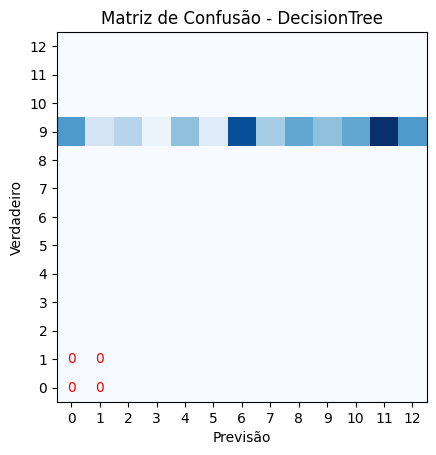

A precisão do classificador é: 6.9 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.00      0.00      0.00         0
 desalinhamento_horizontal_alto       0.00      0.00      0.00         0
desalinhamento_horizontal_baixo       0.00      0.00      0.00         0
desalinhamento_horizontal_médio       0.00      0.00      0.00         0
  desalinhamento_vertical_baixo       0.00      0.00      0.00         0
  desalinhamento_vertical_médio       0.00      0.00      0.00         0
          desbalanceamento_alto       0.00      0.00      0.00         0
         desbalanceamento_baixo       0.00      0.00      0.00         0
         desbalanceamento_medio       0.00      0.00      0.00         0
                         normal       1.00      0.07      0.13       101
                outer_race_alto       0.00      0.00      0.00         0
               outer_race_baixo       0.00      0.00     

c:\Users\leona\Documents\ProjetoFinal_LeonardoPacheco_UFRJ_LAVI\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\leona\Documents\ProjetoFinal_LeonardoPacheco_UFRJ_LAVI\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\leona\Documents\ProjetoFinal_LeonardoPacheco_UFRJ_LAVI\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

In [15]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),1),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))